In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime

#  1) Getting the Data

## 1.1) Fear and Greed Index

In [19]:
url =  'https://api.alternative.me/fng/?limit=0'
response = requests.get(url, params={'date_format':'MM/DD/YYYY'}).json()
data = pd.DataFrame(response['data'])

In [22]:
sentiment_score_df = data.drop(columns=['time_until_update', 'value_classification']).set_index('timestamp')

In [104]:
sentiment_score_df

,value
timestamp,
02-03-2021,78
01-03-2021,38
28-02-2021,55
27-02-2021,56
26-02-2021,55
...,...
05-02-2018,11
04-02-2018,24
03-02-2018,40


## 1.2) Augmento Topics Count

### Getting topics Indexes: 

In [121]:
topics_url = "http://api-dev.augmento.ai/v0.1/topics"
topics_index = requests.get(topics_url).json()

### Getting list of counts of those topics per day for (BTC_talk, Twitter, and Reddit)

In [207]:
url_agg = "http://api-dev.augmento.ai/v0.1/events/aggregated"

In [208]:
params_BTC_1 = {
  "source" : "bitcointalk",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 1000,
  "start_ptr" : 0,
  "start_datetime" : "2018-02-01T00:00:00Z",
  "end_datetime" : "2020-04-30T00:00:00Z",
}
data_BTC_1 = requests.get(url_agg, params=params_BTC_1).json()
topics_count_BTC_1 = pd.DataFrame(data_BTC_1).drop(columns=['t_epoch'])
topics_count_BTC_1['datetime'] = pd.to_datetime(topics_count_BTC_1['datetime']).dt.date
topics_count_BTC_1 = topics_count_BTC_1.set_index('datetime')


params_BTC_2 = {
  "source" : "bitcointalk",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 500,
  "start_ptr" : 0,
  "start_datetime" : "2020-04-29T00:00:00Z",
  "end_datetime" : "2021-03-02T00:00:00Z",
}
data_BTC_2 = requests.get(url_agg, params=params_BTC_2).json()
topics_count_BTC_2 = pd.DataFrame(data_BTC_2).drop(columns=['t_epoch'])
topics_count_BTC_2['datetime'] = pd.to_datetime(topics_count_BTC_2['datetime']).dt.date
topics_count_BTC_2 = topics_count_BTC_2.set_index('datetime')

In [211]:
params_twitter_1 = {
  "source" : "twitter",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 1000,
  "start_ptr" : 0,
  "start_datetime" : "2018-02-01T00:00:00Z",
  "end_datetime" : "2020-04-30T00:00:00Z",
}
data_twitter_1 = requests.get(url_agg, params=params_twitter_1).json()
topics_count_twitter_1 = pd.DataFrame(data_twitter_1).drop(columns=['t_epoch'])
topics_count_twitter_1['datetime'] = pd.to_datetime(topics_count_twitter_1['datetime']).dt.date
topics_count_twitter_1 = topics_count_twitter_1.set_index('datetime')


params_twitter_2 = {
  "source" : "twitter",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 500,
  "start_ptr" : 0,
  "start_datetime" : "2020-04-29T00:00:00Z",
  "end_datetime" : "2021-03-02T00:00:00Z",
}
data_twitter_2 = requests.get(url_agg, params=params_twitter_2).json()
topics_count_twitter_2 = pd.DataFrame(data_twitter_2).drop(columns=['t_epoch'])
topics_count_twitter_2['datetime'] = pd.to_datetime(topics_count_twitter_2['datetime']).dt.date
topics_count_twitter_2 = topics_count_twitter_2.set_index('datetime')

In [215]:
params_reddit_1 = {
  "source" : "reddit",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 1000,
  "start_ptr" : 0,
  "start_datetime" : "2018-02-01T00:00:00Z",
  "end_datetime" : "2020-04-30T00:00:00Z",
}
data_reddit_1 = requests.get(url_agg, params=params_reddit_1).json()
topics_count_reddit_1 = pd.DataFrame(data_reddit_1).drop(columns=['t_epoch'])
topics_count_reddit_1['datetime'] = pd.to_datetime(topics_count_reddit_1['datetime']).dt.date
topics_count_reddit_1 = topics_count_reddit_1.set_index('datetime')


params_reddit_2 = {
  "source" : "reddit",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 500,
  "start_ptr" : 0,
  "start_datetime" : "2020-04-29T00:00:00Z",
  "end_datetime" : "2021-03-02T00:00:00Z",
}
data_reddit_2 = requests.get(url_agg, params=params_reddit_2).json()
topics_count_reddit_2 = pd.DataFrame(data_reddit_2).drop(columns=['t_epoch'])
topics_count_reddit_2['datetime'] = pd.to_datetime(topics_count_reddit_2['datetime']).dt.date
topics_count_reddit_2 = topics_count_reddit_2.set_index('datetime')

In [212]:
topics_count_BTC_df = pd.concat([topics_count_BTC_1,topics_count_BTC_2])
topics_count_twitter_df = pd.concat([topics_count_twitter_1,topics_count_twitter_2])
topics_count_reddit_df = pd.concat([topics_count_reddit_1,topics_count_reddit_2])

In [220]:
topics_count_BTC_df.columns=['BTC_counts']
topics_count_twitter_df.columns=['twitter_counts']
topics_count_reddit_df.columns=['reddit_counts']

In [226]:
topics_count_df = pd.merge(topics_count_BTC_df,topics_count_twitter_df,right_index=True,left_index=True).merge(topics_count_reddit_df,right_index=True,left_index=True)

In [229]:
topics_count_df.head()

,BTC_counts,twitter_counts,reddit_counts
datetime,,,
2018-02-01,"[30, 199, 207, 200, 53, 150, 20, 1, 2, 54, 24,...","[19, 35, 53, 179, 26, 44, 22, 5, 22, 83, 22, 4...","[25, 142, 143, 330, 60, 90, 107, 2, 12, 90, 32..."
2018-02-02,"[40, 217, 142, 275, 123, 126, 31, 2, 5, 93, 15...","[30, 42, 51, 173, 43, 29, 28, 12, 21, 144, 35,...","[23, 143, 118, 343, 92, 72, 122, 12, 10, 142, ..."
2018-02-03,"[25, 181, 145, 177, 47, 96, 14, 3, 4, 53, 17, ...","[11, 20, 91, 91, 12, 70, 10, 16, 20, 48, 25, 3...","[24, 72, 101, 128, 37, 66, 52, 8, 4, 40, 24, 5..."
2018-02-04,"[25, 159, 114, 151, 36, 88, 19, 1, 1, 23, 7, 3...","[13, 22, 86, 87, 12, 45, 21, 4, 19, 46, 28, 36...","[11, 73, 116, 121, 45, 64, 48, 4, 5, 52, 14, 3..."
2018-02-05,"[29, 202, 174, 231, 56, 97, 29, 2, 6, 81, 18, ...","[14, 35, 180, 155, 21, 35, 39, 3, 16, 143, 23,...","[26, 154, 215, 302, 89, 99, 97, 12, 14, 163, 5..."


### creating scores DataFrame

In [230]:
topics_index_value = {'0': 0,
 '1': -1,'2': 0, '3': -1,'4': 0,'5': 0,'6': -1,'7': 0,'8': 0,'9': 0,'10': 0,'11': 0,'12': 0,'13': 0,'14': -1,'15': 0,'16': -1,'17': 0,'18': 0,'19': 0,'20': 0,'21': 0,'22': 0,'23': 1,'24': 1,'25': 0,'26': -1,'27': -1,'28': 0,'29': 0,'30': 0,'31': 0,'32': -1,'33': 1,'34': 0,'35': 0,'36': 1,'37': -1,'38': 1,'39': 1,'40': -1,'41': 0,'42': 1,'43': 0,'44': 0,'45': 0,'46': 1,'47': 0,'48': -1,'49': 0,'50': 0,'51': 0,'52': 0,'53': -1,'54': -1,'55': 0,'56': 0,'57': 0,'58': 0,'59': 0,'60': 0,'61': 0,'62': 0,'63': 1,'64': -1,'65': 0,'66': 0,'67': 0,'68': 0,'69': 0,'70': 0,'71': 1,'72': 0,'73': -1,'74': 0,'75': 1,'76': 0,'77': 0,'78': 0,'79': 0,'80': 0,'81': -1,'82': 1,'83': 1,'84': -1,'85': -1,'86': 0,'87': 0,'88': 0,'89': -1,'90': 0,'91': 1,'92': -1}

In [231]:
def feature_creation(counts):
    positive_counts = []
    neg_counts = []
    for key, value in topics_index_value.items():
        if value==1:
            positive_counts.append(counts[int(key)])
        elif value==-1:
            neg_counts.append(counts[int(key)])
    
    X = (sum(positive_counts)+sum(neg_counts))
    
    if X==0:
        return np.NaN
    else:
        return sum(positive_counts)/X

In [233]:
topics_count_df['BTC_score'] = topics_count_df['BTC_counts'].apply(feature_creation)
topics_count_df['twitter_score'] = topics_count_df['twitter_counts'].apply(feature_creation)
topics_count_df['reddit_score'] = topics_count_df['reddit_counts'].apply(feature_creation)

In [243]:
topics_count_df[['BTC_score','twitter_score','reddit_score']].head()

,BTC_score,twitter_score,reddit_score
datetime,,,
2018-02-01,0.496911,0.569701,0.429601
2018-02-02,0.479340,0.552322,0.430662
2018-02-03,0.495011,0.585380,0.453424
2018-02-04,0.499830,0.554089,0.444839
2018-02-05,0.469328,0.529476,0.438090


In [ ]:
topics_count_df.to_csv('Augmento_Scores_df')

### Visualizing the score Fluctuations

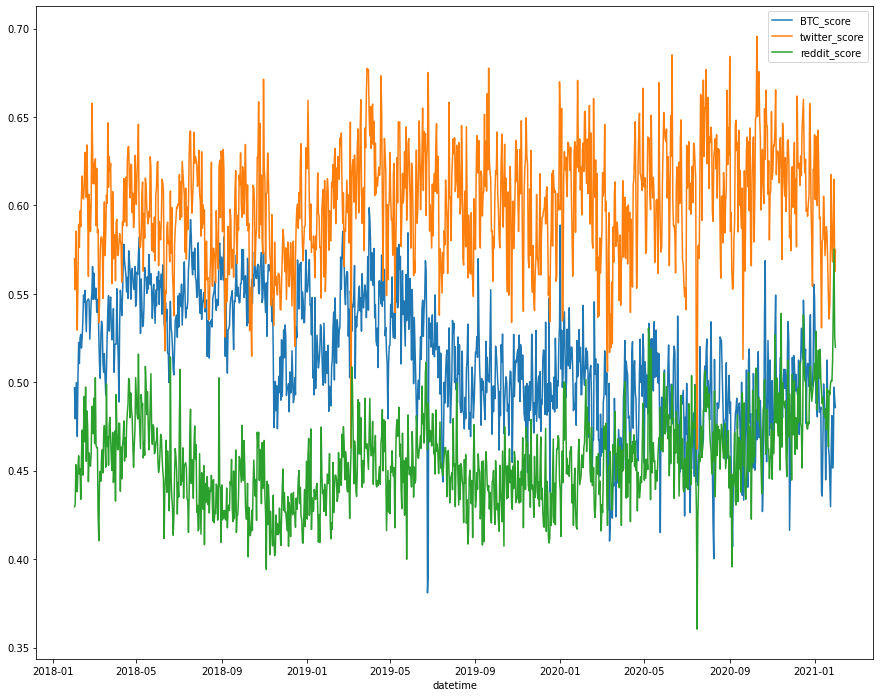

In [242]:
figure = plt.figure(figsize=(15,12))
topics_count_df['BTC_score'].plot()
topics_count_df['twitter_score'].plot()
topics_count_df['reddit_score'].plot()
plt.legend()